In [1]:
# -*-coding:utf-8-*-
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing

from src.data.Convert_raw import *
from math import sqrt

In [2]:
# load countries
coun = pd.read_csv('../data/raw/Countries_114.csv', sep=';')

coun['index'] = coun.index
#coun2ind = coun['id_3char']
coun2ind = coun['cid']

In [3]:
coun_all = pd.read_csv('../data/raw/country_names.csv')
coun_all['index'] = coun_all.index
#coun2ind = coun['id_3char']
coun2ind_all = coun_all['cid']

In [6]:
def filter_conutries(df_year,coun2ind):
    df_tmp = df_year[df_year['ori'].isin(coun2ind)]
    df_tmp = df_tmp [df_tmp['des'].isin(coun2ind)]
    return df_tmp

In [12]:
# load full data of 1963, this data contains countries beyond the 114 to be considered
#pre_path = '../data/raw/SITC_'
pre_path = 'C:/Users/Xianc/Dropbox/2018_Power_and_dependence_XL_IC_PP/Data_from_OEC/SITC_'
year = 1998
path = pre_path + str(year) + '.csv'
df_year = pd.read_csv(path, header=None)
df_year.columns = ['year', 'ori', 'des', 'SITC', 'exp_v', 'imp_v']

In [13]:
def export_only(df_year):
    df_year = df_year[[ u'ori', u'des', u'exp_v','SITC']]
    df_year = df_year[df_year['exp_v'] != 0]
    return df_year

df_year = export_only(df_year)

In [15]:
len(df_year)

1764242

In [16]:
df_tmp = filter_conutries(df_year,coun2ind)

In [17]:
len(df_tmp)

1143167

In [18]:
def node_link_dis(group):
    d1 = len(group)
    d2 = len(set(group['ori']).union(set(group['des'])))
    try:
        d3 = 2.0*d1/(d2*(d2-1))
    except(ZeroDivisionError):
        print (group)
    #res = pd.merge(d1,d2,left_index = True,right_index = True)
    res = pd.Series([d1,d2,d3])
    return res

In [19]:
def draw_topo_stat(df_year,coun2ind= [],agg = 0):
    df_year = export_only(df_year)
    df_tmp = df_year.copy()
    if len(coun2ind) != 0:
        df_tmp = filter_conutries(df_year,coun2ind)
    
    groups_product = df_tmp.groupby('SITC')
    a = groups_product.apply(node_link_dis)
    a = a.sort_values(by = 1)
    a.columns = ['#edges','#nodes','density']
    a = a[a['#nodes']!=2]
    a.plot.scatter(x = 1,y=0,marker='.')
    a.plot.scatter(x = 1,y=2,marker='.')
    return a

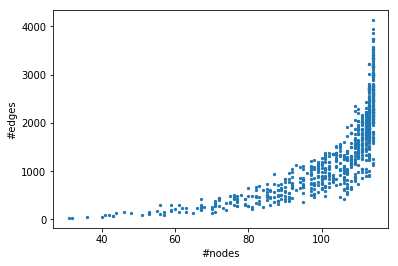

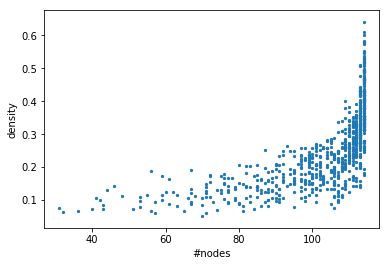

In [20]:
a = draw_topo_stat(df_year,coun2ind)

In [100]:
len(df_year.groupby('SITC').size())

773

In [21]:
b.sort_values(by = 'density')

NameError: name 'b' is not defined

In [72]:
df_year[df_year['SITC'] == 8928]

,ori,des,exp_v,SITC
534,abw,can,162.0,8928
1081,abw,cri,160.0,8928
2284,abw,mex,2098.0,8928
2919,abw,pan,582.0,8928
3231,abw,qat,423.0,8928
4536,afg,are,4397.0,8928
4568,afg,arg,5.0,8928
4946,afg,bel,1467.0,8928
5082,afg,bhr,980.0,8928
5426,afg,can,7577.0,8928


In [93]:
len(df_year)

4084177

In [64]:
m = df_tmp[df_tmp['SITC'] == 7239]

In [67]:
m.drop_duplicates( ['ori','des'])

,ori,des,exp_v,SITC
4420,afg,are,1968.0,7239
5739,afg,chn,303.0,7239
7279,afg,gbr,1411.0,7239
9052,afg,nga,1640549.0,7239
12374,ago,aus,58606.0,7239
12459,ago,aut,240.0,7239
13587,ago,can,53.0,7239
15274,ago,esp,1277.0,7239
16095,ago,gbr,915377.0,7239
16277,ago,gha,879.0,7239


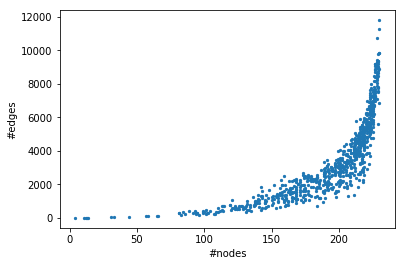

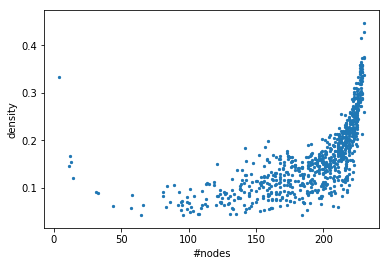

In [57]:
b = draw_topo_stat(df_year)

In [125]:
a

,#edges,#nodes,density
SITC,,,
2714,2.0,2.0,2.000000
2654,18.0,11.0,0.327273
2232,16.0,11.0,0.290909
2655,20.0,11.0,0.363636
2114,22.0,13.0,0.282051
6121,52.0,22.0,0.225108
2659,66.0,25.0,0.220000
2860,89.0,35.0,0.149580
6344,122.0,40.0,0.156410


In [ ]:
def create_agg_edge_list(df_year,node_l,convert2id = 0):
    df_tmp = df_year.copy()

    if convert2id == 1:
        d = node_l.to_dict()
        d = d[0]
        d = {v: k for k, v in d.items()}

        df_tmp['ori'] = df_tmp['ori'].map(d)
        df_tmp['des'] = df_tmp['des'].map(d)

    df_sum = df_tmp.groupby(['ori', 'des']).sum()
    df_sum = df_sum.reset_index()

    return df_sum

In [ ]:
def create_product_edge_list(df_year,node_l):
    df_year.columns = ['year', 'ori', 'des', 'SITC', 'exp_v', 'imp_v']
    df_tmp = df_year.copy()

    df_tmp = df_tmp[[ u'ori', u'des', u'exp_v']]
    df_tmp = df_tmp[df_tmp['exp_v'] != 0]
    

In [116]:
df_tmp = df_tmp[[ u'ori', u'des', u'exp_v','SITC']]
df_tmp = df_tmp[df_tmp['exp_v'] != 0]

In [119]:
df_tmp = df_year.copy()

In [120]:
df_tmp = df_tmp[[ u'ori', u'des', u'exp_v','SITC']]
df_tmp = df_tmp[df_tmp['exp_v'] != 0]

In [7]:
# choose the first country to test the data
df_afg = df_year[df_year['ori'] == 'afg']

In [8]:
df_afg

,year,ori,des,SITC,exp_v,imp_v
0,1963,afg,aus,224,0.0,4000.0
1,1963,afg,aus,2120,2000.0,0.0
2,1963,afg,aus,2690,0.0,4000.0
3,1963,afg,aus,6412,0.0,3000.0
4,1963,afg,aus,6590,1000.0,0.0
5,1963,afg,aus,6592,5000.0,0.0
6,1963,afg,aus,6990,0.0,1000.0
7,1963,afg,aus,6991,0.0,8000.0
8,1963,afg,aus,7430,0.0,1000.0
9,1963,afg,aus,8999,0.0,1000.0


In [9]:
# consider 114 countries
df_afg_114 = df_afg[df_afg['des'].isin(coun['cid'])]

In [10]:
df_afg_114

,year,ori,des,SITC,exp_v,imp_v
0,1963,afg,aus,224,0.0,4000.0
1,1963,afg,aus,2120,2000.0,0.0
2,1963,afg,aus,2690,0.0,4000.0
3,1963,afg,aus,6412,0.0,3000.0
4,1963,afg,aus,6590,1000.0,0.0
5,1963,afg,aus,6592,5000.0,0.0
6,1963,afg,aus,6990,0.0,1000.0
7,1963,afg,aus,6991,0.0,8000.0
8,1963,afg,aus,7430,0.0,1000.0
9,1963,afg,aus,8999,0.0,1000.0


In [12]:
# calculate the sum
df_afg_114[['exp_v','imp_v']].sum()

exp_v    77948000.0
imp_v    57025000.0
dtype: float64

In [13]:
# calculate for all countries
dict_coun2ind = coun2ind.to_dict()
dict_coun2ind = {v: k for k, v in dict_coun2ind.items()}
Cmap = dict_coun2ind
df_tmp = df_year.copy()
df_tmp['ori'] = df_tmp['ori'].map(Cmap)
df_tmp['des'] = df_tmp['des'].map(Cmap)
df_tmp = df_tmp.dropna()
df_tmp['ori'] = df_tmp['ori'].map(lambda x: int(x))
df_tmp['des'] = df_tmp['des'].map(lambda x: int(x))
df_sum = df_tmp.groupby(['ori', 'des']).sum()
# df_sum.loc[(0,slice(None)),:]
# select in multi-index
df_agg = df_tmp[['ori','exp_v','imp_v']].groupby('ori').sum()

In [14]:
df_agg

,exp_v,imp_v
ori,,
0,7.794800e+07,5.702500e+07
1,1.381980e+08,1.119900e+08
2,3.244000e+06,8.159000e+06
3,0.000000e+00,7.210000e+05
4,1.423045e+09,9.383970e+08
5,2.720051e+09,2.306362e+09
6,1.127630e+09,1.508793e+09
7,7.170000e+05,6.500000e+06
8,1.516500e+07,3.069300e+07


In [15]:
# add countries with either exp nor imp
df_agg.index.name = None
df_agg_all = pd.merge(df_agg,coun[['cid']],left_index = True, right_index = True,how = 'right')
df_agg_all = df_agg_all.fillna(0)

In [16]:
df_agg_all

,exp_v,imp_v,cid
0,7.794800e+07,5.702500e+07,afg
1,1.381980e+08,1.119900e+08,ago
2,3.244000e+06,8.159000e+06,alb
3,0.000000e+00,7.210000e+05,are
4,1.423045e+09,9.383970e+08,arg
5,2.720051e+09,2.306362e+09,aus
6,1.127630e+09,1.508793e+09,aut
7,7.170000e+05,6.500000e+06,bdi
8,1.516500e+07,3.069300e+07,ben
9,1.037900e+07,3.634900e+07,bfa
